In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [14]:
# Nearest Neighbor interpolation
def NN (img, ax=1, ay=1):
    h, w, ch = img.shape
    
    ah = int(ay * h)
    aw = int(ax * w)
    
    y = np.arange(ah).repeat(aw).reshape(ah, -1)
    x = np.tile(np.arange(aw), (ah,1))
    y = np.round(y/ay).astype(np.int)
    x = np.round(x/ax).astype(np.int)
    
    out = img[y,x]
    out = out.astype(np.uint8)
    
    return out

(128, 128, 3) (192, 192, 3)


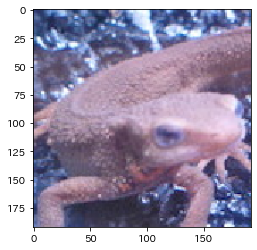

In [15]:
img = cv2.imread("../assets/imori.jpg").astype(np.float)
# Nearest Neighbor
out = NN(img, ax=1.5, ay=1.5)  # 128 -> 192
plt.imshow(out[:,:,::-1])
print(img.shape, out.shape)

In [16]:
# Bi-Linear interpolation
def Bi_liniar(img, ax=1, ay =1):
    h, w, ch = img.shape
    
    ah = int(ay * h)
    aw = int(ax * w)
    
    # get position of resized image
    y = np.arange(ah).repeat(aw).reshape(ah, -1)
    x = np.tile(np.arange(aw), (ah, 1))
    
    # get position of original position
    y = y / ay
    x = x / ax
    
    ix = np.floor(x).astype(np.int)
    iy = np.floor(y).astype(np.int)
    
    ix = np.minimum(ix, w-2)
    iy = np.minimum(iy, h-2)
    
    #get distance
    dx = x - ix
    dy = y - iy
    
    dx = np.repeat(np.expand_dims(dx, axis=-1), 3, axis=-1)
    dy = np.repeat(np.expand_dims(dy, axis=-1), 3, axis=-1)
    
    # interpolation
    out = (1-dx) * (1-dy) * img[iy, ix] + dx * (1-dy) * img[iy,ix+1] + (1-dx) * img[iy+1,ix] + dx * dy * img[iy+1,ix+1]
    
    out = np.clip(out, 0, 255)
    out = out.astype(np.uint8)
    
    return out

(128, 128, 3) (192, 192, 3)


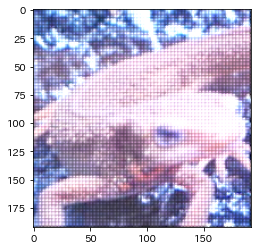

In [17]:
# Bilinear interpolation
out = Bi_liniar(img, ax=1.5, ay=1.5)
plt.imshow(out[:,:,::-1])
print(img.shape, out.shape)

In [33]:
# Bi-cubic interpolation
def Bi_cubic(img, ax=1, ay=1):
    h, w, ch = img.shape
    
    ah = int(ay * h)
    aw = int(ax * w)
    
    # get position of resized image
    y = np.arange(ah).repeat(aw).reshape(ah, -1)
    x = np.tile(np.arange(aw), (ah, 1))
    
    # get position of original position
    y = y / ay
    x = x / ax
    
    ix = np.floor(x).astype(np.int)
    iy = np.floor(y).astype(np.int)
    
    ix = np.minimum(ix, w-2)
    iy = np.minimum(iy, h-2)
    
    # get distancce of each position of original image
    dx2 = x - ix
    dy2 = y - iy
    dx1 = dx2 + 1
    dy1 = dy2 + 1
    dx3 = 1 - dx2
    dy3 = 1 - dy2
    dx4 = 1 + dx3
    dy4 = 1 + dy3
    
    dxs = [dx1, dx2, dx3, dx4]
    dys = [dy1, dy2, dy3, dy4]
    
    # Bi-cubic weight
    def weight(t):
        a = -1
        at = np.abs(t)
        w = np.zeros_like(t)
        ind = np.where(at <= 1)
        w[ind] = ((a+2) * np.power(at,3) - (a+3) * np.power(at,2) * np.power(at,2) + 1)[ind]
        ind = np.where((at > 1) & (at <= 2))
        w[ind] = (a * np.power(at,3) - 5 * a * np.power(at,2) + 8 * a * at - 4 * a)[ind]
        return w
    
    w_sum = np.zeros((ah, aw, ch), dtype=np.float32)
    out = np.zeros((ah, aw, ch), dtype=np.float32)
    
    # interpolate
    for j in range(-1, 3):
        for i in range(-1, 3):
            ind_x = np.minimum(np.maximum(ix+i, 0), w-1)
            ind_y = np.minimum(np.maximum(iy+j, 0), h-1)
            
            wx = weight(dxs[i+1])
            wy = weight(dys[j+1])
            wx = np.repeat(np.expand_dims(wx, axis=-1), 3, axis=-1)
            wy = np.repeat(np.expand_dims(wy, axis=-1), 3, axis=-1)
            
            w_sum += wx * wy
            out += wx * wy * img[ind_y, ind_x]
            
    out /= w_sum
    out = np.clip(out, 0, 255)
    out = out.astype(np.uint8)
    
    return out

(128, 128, 3) (192, 192, 3)


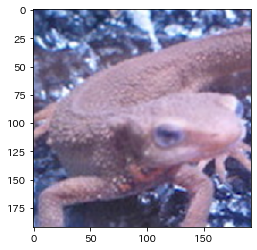

In [34]:
# Bicubic interpolation
out = Bi_cubic(img, ax=1.5, ay=1.5)
plt.imshow(out[:,:,::-1])
print(img.shape, out.shape)